In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from HFTS2Lib import DataIO

In [8]:
proj_list = pd.read_excel('./HFTS2_XWell_Datasets.xlsx')
inject_well = 'B1'
monitor_well = 'B3'
well_projs = proj_list[(proj_list['injector'] == inject_well) & (proj_list['monitor'] == monitor_well)]
well_projs

,injector,monitor,folder
7,B1,B3,E:\Projects\HFTS2\Data\c\Anadarko_B1H_(B3H)_CWC


In [29]:
proj_info = well_projs.iloc[0]
proj = DataIO.DxSProject(proj_info['folder'])

Reading pump curves...
Available datasets:
['0.1 Hz', '0.1 Hz Diff', '1 Hz', '1 Hz Diff', 'Curves', 'DAS Absolute']


In [30]:
proj.set_depth_range(4000,None)
proj.set_current_dataset('0.1 Hz Diff')
proj.print_current_dataset_info()

Dataset: 0.1 Hz Diff
Number of files: 2831
First file: sensor_2019-03-18T201959Z.h5
Last file: sensor_2019-03-28T164436Z.h5
Total size: 1651.4 MB


In [31]:
DASdata = proj.read_dataset(start_time='2019-03-20', end_time='2019-03-21')

100%|██████████| 288/288 [00:03<00:00, 83.03it/s]


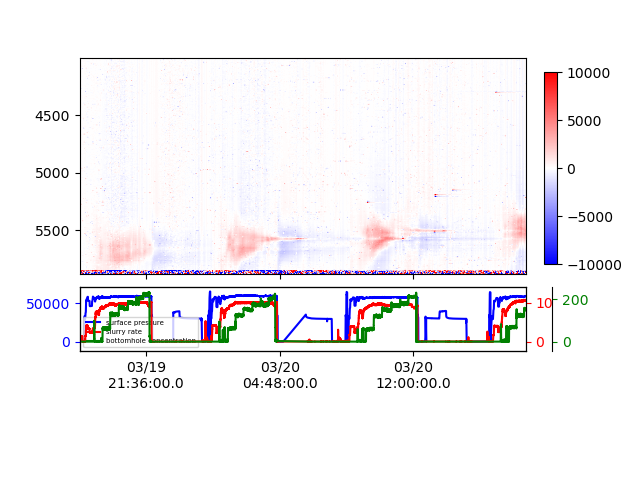

In [33]:
fig = plt.figure()
p = proj.get_coplot_simple(fig,c_range=1e4)
p.draw()
plt.show()